# Exploratory Data Analysis for ICO Fraud Detection Project

## 1. File with information about ICO

In [4]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta
import plotly.graph_objects as go
import pickle
from ico_parser import ICOParser

#pd.options.plotting.backend = "plotly"

In [5]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=',')
df_info.set_index('ico',inplace=True)
df_info.market_start_date = pd.to_datetime(df_info.market_start_date)

In [6]:
df_info.head()

,adress,fraud,start_date,market_start_date,diff_days,market_days,size_ok,price,market_cap,o_concur,biggest_holder,exchange,contract,date_analysis,code,site,social_media
ico,,,,,,,,,,,,,,,,,
0X,0xe41d2489571d322189246dafa5ebde1f4699f498,0,2017-08-11,2017-08-15,4,1124,NaN,NaN,45.0,x,2,6,14,2018-02-11,NaN,NaN,NaN
0XCERT,0x83e2be8d114f9661221384b3a50d24b96a5653f5,1,2018-06-26,2018-07-11,15,794,x,NaN,NaN,NaN,12,2,0,2019-01-07,x,x,x
4NEW,0x241ba672574a78a3a604cdd0a94429a73a84a324,1,2018-08-20,2018-08-20,0,754,x,NaN,NaN,NaN,50,7,0,2019-02-16,x,NaN,NaN
ABULABA,0xd938137e6d96c72e4a6085412ada2dad78ff89c4,1,2018-04-19,2018-12-16,241,636,NaN,x,NaN,NaN,13,7,41,2019-06-14,x,NaN,NaN
AELF,0xbf2179859fc6d5bee9bf9158632dc51678a4100e,0,2017-12-18,2017-12-21,3,996,NaN,NaN,154.0,x,13,10,0,2018-06-19,NaN,NaN,NaN


## 2. Extracting the data

In [7]:
path_to_csvs = '/home/gabriel/Documents/Repos/time_series_study/data_and_models/all_icos/'
list_icos = df_info.index.to_list()

In [ ]:
%%time
list_values = []
for ico in list_icos:
    #print(ico)
    ico_csv= f'{path_to_csvs}{ico}.csv'
    is_fraud = df_info.at[ ico, 'fraud']
    try:
        df_current_ico = pd.read_csv(ico_csv)
        number_transactions = df_current_ico.shape[0] 
        list_values.append([ico,
                           number_transactions,
                           df_current_ico.RECEIPT_GAS_USED.astype(float).sum()/number_transactions,
                           df_current_ico.GAS.astype(float).sum()/number_transactions,
                           len(df_current_ico.FROM_ADDRESS.unique())/number_transactions,
                           len(df_current_ico.TO_ADDRESS.unique())/number_transactions,
                           is_fraud]
                           )
    except FileNotFoundError:
        print(f'Error on ICO: {ico}')
    
    

In [ ]:
df_eda = pd.DataFrame(list_values, columns=['ico', 
                                   'Número de Transações', 
                                   'Média Gas Receipt', 
                                   'Média Gas',
                                   'Média From Adress',
                                   'Média To Address',
                                   'Fraude'])
df_eda.head()

## 2. Visual exploration of data

### 2.1. Boxplot - Total transactions

In [ ]:
import plotly.express as px
fig = px.box(df_eda, x="Fraude", y="Número de Transações", points="all", log_y=True, color='Fraude')
fig.show()

### 2.2. Boxplot - Média Gas Receipt

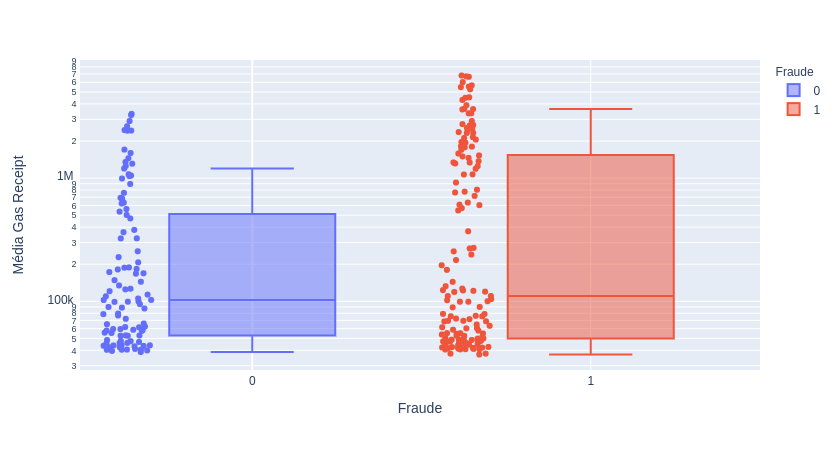

In [8]:
fig = px.box(df_eda, x="Fraude", y="Média Gas Receipt", points="all", log_y=True, color='Fraude')
fig.show()

### 2.3. Boxplot - Média Gas

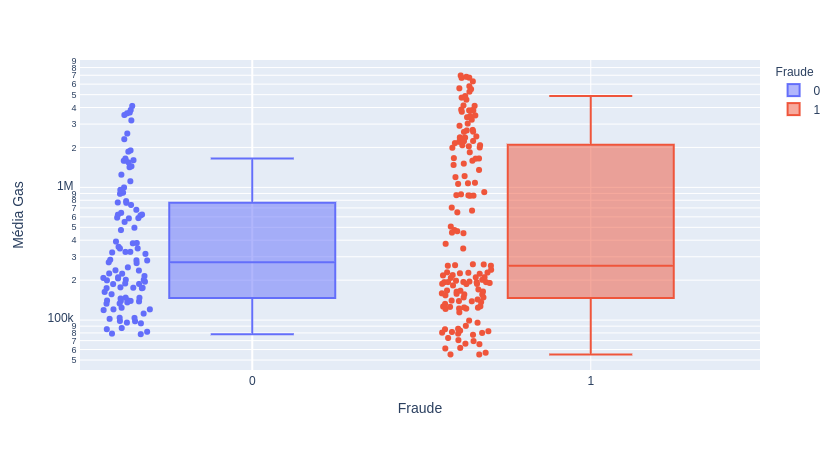

In [9]:
fig = px.box(df_eda, x="Fraude", y="Média Gas", points="all", log_y=True, color='Fraude')
fig.show()

### 2.4. Boxplot - Média From Adress

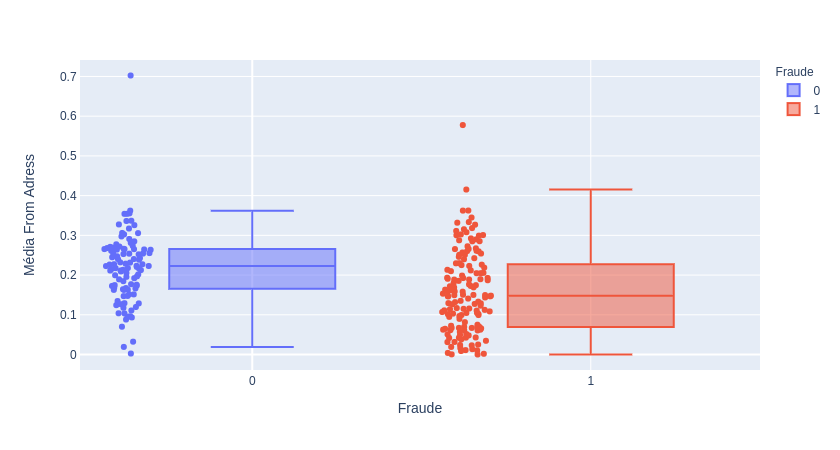

In [10]:
fig = px.box(df_eda, x="Fraude", y="Média From Adress", points="all", log_y=False, color='Fraude')
fig.show()

### 2.5. Boxplot - Média To Adress

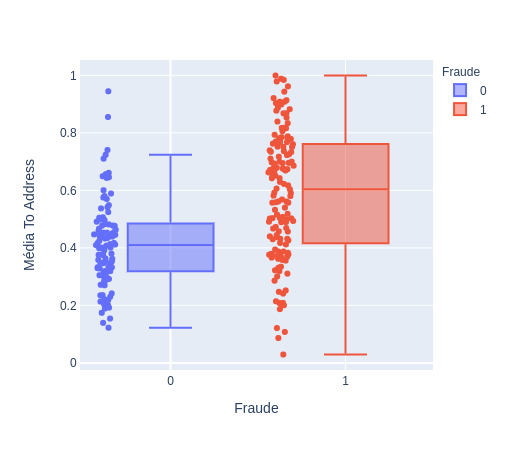

In [24]:
fig = px.box(df_eda, x="Fraude", y="Média To Address", points="all", log_y=False, color='Fraude')
fig.show()

### 2.6. Boxplot - Média Newbiers

In [25]:
df_eda

,ico,Número de Transações,Média Gas Receipt,Média Gas,Média From Adress,Média To Address,Fraude
0,0X,301485,5.876486e+04,1.475736e+05,0.223255,0.332806,0
1,0XCERT,21145,5.786318e+04,1.220356e+05,0.143580,0.783921,1
2,4NEW,22563,1.527679e+06,1.651859e+06,0.172583,0.501972,1
3,ABULABA,4214,4.109039e+04,1.244334e+05,0.204794,0.387518,1
4,AELF,109117,1.308478e+06,1.595182e+06,0.163256,0.375835,0
...,...,...,...,...,...,...,...
249,WAX,86889,8.996399e+04,2.012845e+05,0.189253,0.334968,0
250,WAYKICHAIN,53424,4.585061e+04,1.021145e+05,0.247230,0.304900,0
251,ZILLIQA,194206,4.750134e+04,1.948039e+05,0.217645,0.331890,0
252,ZPAY,10866,5.657279e+06,5.782420e+06,0.062581,0.898767,1


In [42]:
ico_parser = ICOParser(ico_csv,
                     date_column='BLOCK_TIMESTAMP',
                     value_column='VALUE',
                     ico_start_date=market_start_date, 
                     fraud_flag=is_fraud)

In [52]:
list_newbiers_ratio = []

In [ ]:
%%time
for ico in list_icos[10:]:
    ico_csv= f'{path_to_csvs}{ico}.csv'
    market_start_date = str(df_info.at[ ico, 'market_start_date'].date())
    is_fraud = df_info.at[ ico, 'fraud']
    try:
        print(ico)
        ico_parser = ICOParser(ico_csv,
                     date_column='BLOCK_TIMESTAMP',
                     value_column='VALUE',
                     ico_start_date=market_start_date, 
                     fraud_flag=is_fraud,
                          len_time_series=20)
        ico_parser.get_newbiers_dataframe()
        list_newbiers_ratio.append([ico, 
                                    ico_parser.df_newbiers.shape[0]/ico_parser.df.shape[0],
                                    is_fraud]                                    
                                    )
        
    except:
        print(f'PROBLEM WITH: {ico}')

In [59]:
df_newbiers_boxplot = pd.DataFrame(list_newbiers_ratio, columns=['ico', 'Proporção de transações Newbiers sobre total', 'Fraude'])
df_newbiers_boxplot

,ico,Proporção de transações Newbiers sobre total,Fraude
0,0X,0.449505,0
1,0XCERT,0.180390,1
2,4NEW,0.249544,1
3,ABULABA,0.566799,1
4,AELF,0.674652,0
...,...,...,...
246,WAX,0.574974,0
247,WAYKICHAIN,0.236085,0
248,ZILLIQA,0.147320,0
249,ZPAY,0.922232,1


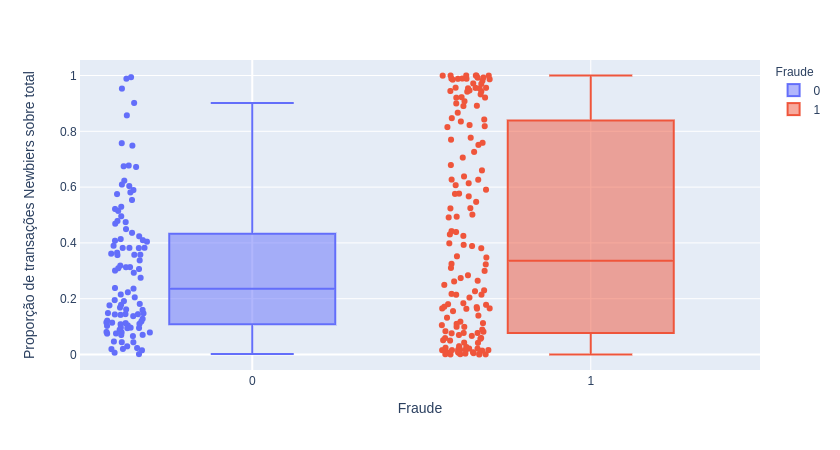

In [60]:
fig = px.box(df_newbiers_boxplot, x="Fraude", y="Proporção de transações Newbiers sobre total", points="all", log_y=False, color='Fraude')
fig.show()

## 3. Histogram with number of transactions per day

In [29]:
import plotly.express as px

In [49]:
df_info.head(100)

,adress,fraud,start_date,market_start_date,diff_days,market_days,size_ok,price,market_cap,o_concur,biggest_holder,exchange,contract,date_analysis,code,site,social_media
ico,,,,,,,,,,,,,,,,,
0X,0xe41d2489571d322189246dafa5ebde1f4699f498,0,2017-08-11,2017-08-15,4,1124,NaN,NaN,45.0,x,2,6,14,2018-02-11,NaN,NaN,NaN
0XCERT,0x83e2be8d114f9661221384b3a50d24b96a5653f5,1,2018-06-26,2018-07-11,15,794,x,NaN,NaN,NaN,12,2,0,2019-01-07,x,x,x
4NEW,0x241ba672574a78a3a604cdd0a94429a73a84a324,1,2018-08-20,2018-08-20,0,754,x,NaN,NaN,NaN,50,7,0,2019-02-16,x,NaN,NaN
ABULABA,0xd938137e6d96c72e4a6085412ada2dad78ff89c4,1,2018-04-19,2018-12-16,241,636,NaN,x,NaN,NaN,13,7,41,2019-06-14,x,NaN,NaN
AELF,0xbf2179859fc6d5bee9bf9158632dc51678a4100e,0,2017-12-18,2017-12-21,3,996,NaN,NaN,154.0,x,13,10,0,2018-06-19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EXIMCHAIN,0x00c4b398500645eb5da00a1a379a88b11683ba01,1,2018-04-22,2018-04-22,0,874,x,x,NaN,NaN,50,0,0,2018-10-19,x,x,NaN
FACEBLOCK,0xc0c2ee1ce1fed8f6e2764363a36db3dd4cf10022,1,2017-11-12,2017-11-14,2,1033,x,NaN,NaN,NaN,30,0,29,2018-05-13,NaN,x,NaN
FANTOM,0x4e15361fd6b4bb609fa63c81a2be19d873717870,0,2018-06-15,2018-06-15,0,820,NaN,NaN,172.0,x,3,23,2,2018-12-12,NaN,NaN,NaN


In [42]:
def plot_histogram_transactions(ico, time_range='D'):
    ico_csv= f'{path_to_csvs}{ico}.csv'    
    df_current_ico = pd.read_csv(ico_csv)
    df_current_ico.BLOCK_TIMESTAMP = pd.to_datetime(df_current_ico.BLOCK_TIMESTAMP)
    df_current_ico['TRANSACTIONS'] = 1
    df_current_ico.sort_values(by='BLOCK_TIMESTAMP', inplace=True)
    df_resample = df_current_ico.resample(
        time_range, on='BLOCK_TIMESTAMP'
    ).sum()
    fig = px.histogram(x=df_resample.TRANSACTIONS)
    fig.show()       
    

### 3.1. Resampling by day ('D')

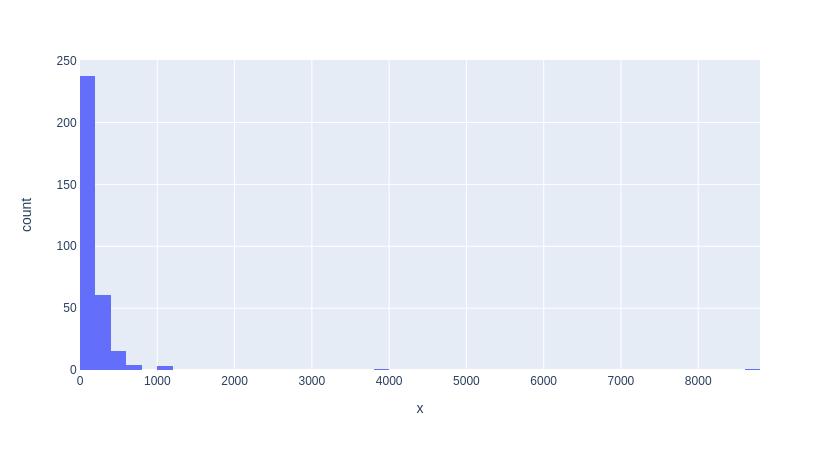

CPU times: user 7.06 s, sys: 24 ms, total: 7.08 s
Wall time: 7.11 s


In [50]:
%%time
plot_histogram_transactions('FETCH', 'D')

### 3.2. Resampling by Hour ('h')

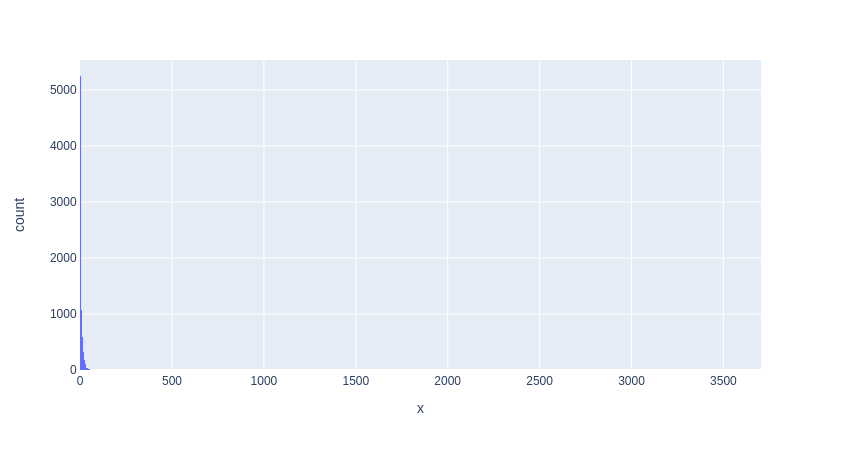

CPU times: user 7.43 s, sys: 15.9 ms, total: 7.44 s
Wall time: 7.46 s


In [51]:
%%time
plot_histogram_transactions('FETCH', 'h')

## 4. Autocorrelation
https://www.statology.org/autocorrelation-python/

In [5]:
path_to_csvs = '/home/gabriel/Documents/Repos/time_series_study/data_and_models/all_icos/'
list_icos = df_info.index.to_list()

In [14]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

In [27]:
def plot_autocorrelation(ico, file_name, title='Autocorrelação'):
    ico_csv= f'{path_to_csvs}{ico}.csv'
    market_start_date = str(df_info.at[ ico, 'market_start_date'].date())
    is_fraud = df_info.at[ ico, 'fraud']
    ico_parser = ICOParser(ico_csv,
                         date_column='BLOCK_TIMESTAMP',
                         value_column='VALUE',
                         ico_start_date=market_start_date, 
                         fraud_flag=is_fraud,
                              len_time_series=60)
    ico_parser.get_array_autocorrelation_transactions(nlags=60)
    
    # plot autocorrelation function
    fig = tsaplots.plot_acf(ico_parser.array_autocorrelation_transactions, lags=50)
    plt.title(title)
    fig.show()
    fig.savefig(file_name, dpi=300)

/home/gabriel/miniconda3/envs/deeplearning/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
/home/gabriel/miniconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


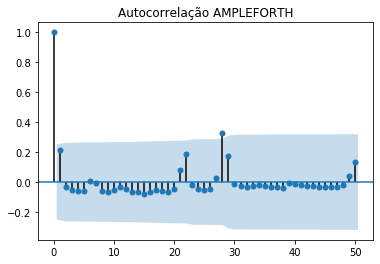

In [28]:
plot_autocorrelation('AMPLEFORTH', 'autocorr_ampleforth.png', title='Autocorrelação AMPLEFORTH')